# Importing Libraries
This code imports necessary libraries for building a CNN model, including TensorFlow for deep learning, NumPy for numerical operations, and image processing utilities.

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

# Defining Parameters and Data Augmentation
We set the parameters for image size, batch size, and epochs. It also configures data augmentation using ImageDataGenerator to enhance training with rescaling, shearing, zooming, and horizontal flipping, while reserving 20% of the data for validation.

In [9]:
# Parameters
img_height, img_width = 150, 150
batch_size = 32
epochs = 20

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Using 20% of data for validation
)

# Setting Up Training Data Generator
We create a data generator for training by loading images from a directory. It resizes them, sets the batch size, and specifies categorical classification. The subset='training' parameter indicates this generator is used for the training set.

In [10]:
train_generator = train_datagen.flow_from_directory(
    'D:\Machine learning\Projects\Sportsperson Classifier\data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 2139 images belonging to 3 classes.


# Setting Up Validation Data Generator
We create a data generator for validation by loading images from the same directory. It resizes them, sets the batch size, and specifies categorical classification. The subset='validation' parameter ensures this generator is used for the validation set.

In [11]:
validation_generator = train_datagen.flow_from_directory(
    'D:\Machine learning\Projects\Sportsperson Classifier\data',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 532 images belonging to 3 classes.


# Building the CNN Model
This constructs a convolutional neural network with multiple layers: convolutional, max-pooling, flatten, dense, and dropout layers. It processes images through a series of convolutions and pooling, ending with a dense layer for classification into three categories.

In [12]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Number of classes
])

# Compiling and Training the Model
The model is compiled with the Adam optimizer and categorical cross-entropy loss. It is then trained for 40 epochs, using the training and validation data generators to evaluate performance.

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/40
66/66 [==============================] - 47s 707ms/step - loss: 1.0678 - accuracy: 0.4457 - val_loss: 1.0849 - val_accuracy: 0.3496
Epoch 2/40
66/66 [==============================] - 44s 676ms/step - loss: 1.0249 - accuracy: 0.4727 - val_loss: 0.9999 - val_accuracy: 0.5352
Epoch 3/40
66/66 [==============================] - 44s 671ms/step - loss: 0.9779 - accuracy: 0.5349 - val_loss: 0.9861 - val_accuracy: 0.4961
Epoch 4/40
66/66 [==============================] - 45s 679ms/step - loss: 0.9566 - accuracy: 0.5558 - val_loss: 0.9438 - val_accuracy: 0.5508
Epoch 5/40
66/66 [==============================] - 45s 674ms/step - loss: 0.9293 - accuracy: 0.5643 - val_loss: 0.9437 - val_accuracy: 0.5684
Epoch 6/40
66/66 [==============================] - 44s 671ms/step - loss: 0.8974 - accuracy: 0.5762 - val_loss: 0.9055 - val_accuracy: 0.5762
Epoch 7/40
66/66 [==============================] - 45s 678ms/step - loss: 0.8777 - accuracy: 0.5937 - val_loss: 0.8915 - val_accuracy: 0.5918

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

17/17 [==============================] - 8s 481ms/step - loss: 0.7469 - accuracy: 0.7425
Validation Accuracy: 74.25%


# Function for Predicting Image Class
This function takes the path of an image, preprocesses it, and predicts its class using the trained model. It also displays the image and prints the predicted class, which in this example is for an image of 'Rohit Sharma'.

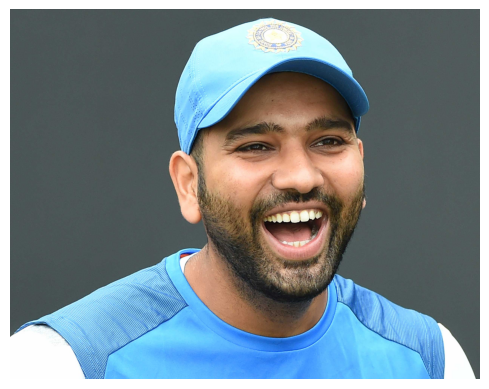

1/1 [==============================] - 0s 20ms/step
The predicted class for the image is: rohit_sharma


In [34]:
# Function to predict a new image
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    class_labels = list(train_generator.class_indices.keys())  # Get class labels
    return class_labels[class_index]

# Example usage
image_path = 'D:\Temp\Image_2.jpg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis("off")
plt.show()

predicted_class = predict_image(image_path)
print(f'The predicted class for the image is: {predicted_class}')

# Function for Predicting Image Class
This function processes an image from a given path and predicts its class using the trained model. The example demonstrates predicting the class for an image of 'Virat Kohli' and displays the image along with the predicted class.

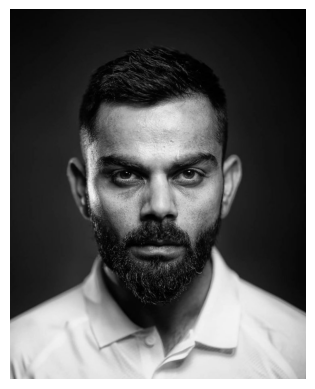

1/1 [==============================] - 0s 19ms/step
The predicted class for the image is: virat_kohli


In [35]:
# Function to predict a new image
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    class_labels = list(train_generator.class_indices.keys())  # Get class labels
    return class_labels[class_index]

# Example usage
image_path = 'D:\Temp\Image_1.jpg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis("off")
plt.show()

predicted_class = predict_image(image_path)
print(f'The predicted class for the image is: {predicted_class}')

# Function for Predicting Image Class
This function processes an image from a specified path and predicts its class using the trained model. The example shows how to predict the class for an image of 'Mahendra Singh Dhoni' and displays the image along with the predicted class.

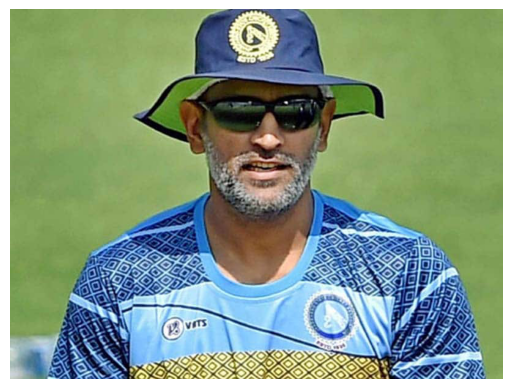

1/1 [==============================] - 0s 21ms/step
The predicted class for the image is: mahendra_singh_dhoni


In [36]:
# Function to predict a new image
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create a batch
    img_array /= 255.0

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions[0])
    class_labels = list(train_generator.class_indices.keys())  # Get class labels
    return class_labels[class_index]

# Example usage
image_path = 'D:\Temp\ms.jpg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis("off")
plt.show()

predicted_class = predict_image(image_path)
print(f'The predicted class for the image is: {predicted_class}')